#### Project Description:

In this project, I’ll apply the Python skills I learned to solve a real-world data science problem. Press “watch next episode” to discover if Netflix’s movies are getting shorter over time, using everything from lists and loops to pandas and matplotlib.

I’ll also showcase my experience in an essential data science skill — exploratory data analysis. I'll be performing critical tasks such as manipulating raw data and drawing conclusions from plots created of the data. 

##### 1. Loading your friend's data into a dictionary:

In [1]:
#Let’s import Pandas and read the data into a dataframe:
import pandas as pd 
df = pd.read_csv("data/netflix_titles.csv")

In [2]:
#Let’s look at the info():
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [3]:
#df.shape

In [4]:
#Let's take a look at the number of rows in the data:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 7787
Number of columns: 12


In [5]:
#Let’s look at the first five rows of the data:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


We can see that there are several categorical columns like 'country', 'rating', 'type'. Let’s define a function that takes as input a data frame, column name, and limit. When called, it prints a dictionary of categorical values and how frequently they appear.

In [6]:
def return_counter(data_frame, column_name, limit):
    from collections import Counter
    print(dict(Counter(data_frame[column_name].values).most_common(limit)))
    #print(dict(data_frame[column_name].value_counts(dropna=False)[:limit]))

Let’s apply our function to the ‘country’ column and limit our results to the five most common values.

In [7]:
return_counter(df, 'country', 5)

{'United States': 2555, 'India': 923, nan: 507, 'United Kingdom': 397, 'Japan': 226}


In [8]:
df['country'].value_counts(dropna=False)[:5]

United States     2555
India              923
NaN                507
United Kingdom     397
Japan              226
Name: country, dtype: int64

As we can see, we have 2555 titles in the US, 923 in India, 507 missing country values, 397 in the UK, and 226 in Japan.

Let’s apply our return_counter function to the ‘director’ column, upon dropping missing values:

In [9]:
#df['director'].dropna(inplace=True)
#df['director'].reset_index(drop=True, inplace=True)
return_counter(df, 'director', 5)

{nan: 2389, 'Raúl Campos, Jan Suter': 18, 'Marcus Raboy': 16, 'Jay Karas': 14, 'Cathy Garcia-Molina': 13}


Now, let’s look at the titles from the most common directors ‘Raul Campos’ and ‘Jan Suter’:

In [10]:
top_directors = df[(df['director'] =='Raúl Campos, Jan Suter')]
print(set(top_directors['title']))
#top_directors

{'Todo lo que sería Lucas Lauriente', 'Fernando Sanjiao: Hombre', 'Daniel Sosa: Sosafado', 'Arango y Sanint: Ríase el show', 'Mea Culpa', 'Coco y Raulito: Carrusel de ternura', 'Jani Dueñas: Grandes fracasos de ayer y hoy', 'Alan Saldaña: Mi vida de pobre', 'Luciano Mellera: Infantiloide', "Ricardo O'Farrill Abrazo Genial", 'Ricardo Quevedo: Hay gente así', 'Sofía Niño de Rivera: Exposed', 'Malena Pichot: Estupidez compleja', "Ricardo O'Farrill: Abrazo navideño", 'Sofía Niño de Rivera: Selección Natural', 'Natalia Valdebenito: El especial', 'Sebastián Marcelo Wainraich', 'Carlos Ballarta: Furia Ñera'}


In [11]:
#df[df['director'] == 'Raúl Campos, Jan Suter']

And the countries:

In [12]:
print(set(top_directors['country']))

{'Colombia', 'Mexico', 'Argentina', 'Chile'}


We see that these are titles from Colombia, Chile, Argentina, and Mexico. Let’s do the same for Marcus Raboy:

In [13]:
Marcus_Raboy = df[(df['director'] =='Marcus Raboy')]
print('Marcus Raboy Titles: ', set(Marcus_Raboy['title']))
print('Countries: ', set(Marcus_Raboy['country']))

Marcus Raboy Titles:  {'Taylor Tomlinson: Quarter-Life Crisis', 'Lynne Koplitz: Hormonal Beast', 'Cristela Alonzo: Lower Classy', 'Patton Oswalt: I Love Everything', 'DeRay Davis: How to Act Black', 'Whitney Cummings: Can I Touch It?', 'Anthony Jeselnik: Fire in the Maternity Ward', 'Katt Williams: Kattpacalypse', 'Dana Carvey: Straight White Male, 60', 'Ryan Hamilton: Happy Face', 'Vir Das: Abroad Understanding', 'Vir Das: Losing It', 'Miranda Sings Live…Your Welcome', 'Judd Apatow: The Return', 'Marlon Wayans: Woke-ish', 'Steve Martin and Martin Short: An Evening You Will Forget for the Rest of Your Life'}
Countries:  {nan, 'United States'}


Now we’ll analyze movie durations. First, we need to filter the data set to only include movie titles:

In [14]:
df_movie = df[df['type'] == 'Movie']

Let’s then print the set of movie durations:

In [15]:
print(set(df_movie['duration']))

{'60 min', '122 min', '200 min', '42 min', '69 min', '162 min', '46 min', '253 min', '68 min', '141 min', '106 min', '19 min', '56 min', '16 min', '27 min', '203 min', '132 min', '64 min', '55 min', '171 min', '59 min', '44 min', '28 min', '18 min', '185 min', '5 min', '65 min', '167 min', '8 min', '31 min', '112 min', '37 min', '93 min', '23 min', '214 min', '90 min', '53 min', '147 min', '157 min', '75 min', '96 min', '129 min', '51 min', '105 min', '143 min', '40 min', '29 min', '165 min', '180 min', '152 min', '166 min', '50 min', '134 min', '58 min', '204 min', '47 min', '164 min', '94 min', '10 min', '76 min', '148 min', '174 min', '195 min', '125 min', '49 min', '114 min', '131 min', '173 min', '224 min', '159 min', '107 min', '126 min', '22 min', '160 min', '230 min', '312 min', '33 min', '233 min', '181 min', '36 min', '92 min', '170 min', '190 min', '57 min', '151 min', '191 min', '81 min', '102 min', '54 min', '11 min', '196 min', '205 min', '66 min', '88 min', '121 min', '7

We see that all values are reported as strings and the duration is measured in minutes. Let’s remove ‘min’ from the string values and convert the result to integers:

In [16]:
# df_movie['duration'] = df_movie['duration'].str.replace(' min', '')
# df_movie['duration']
df_movie['duration'] = df_movie['duration'].map(lambda x: x.rstrip('min')).astype(int)
print(set(df_movie['duration']))

{3, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 176, 177, 178, 179, 180, 181, 182, 185, 186, 187, 189, 190, 191, 192, 193, 194, 195, 196, 200, 201, 203, 204, 205, 208, 209, 214, 224, 228, 230, 233, 237, 253, 312}


C:\Users\atale\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Next, it would be useful to generate summary statistics from numerical columns like ‘duration’. Let’s define a function that takes a data frame, a categorical column, and a numerical column. The mean and standard deviation of the numerical column for each category is stored in a data frame and the data frame is sorted in descending order according to the mean. This is useful if you want to quickly see if certain categories have higher or lower mean and/or standard deviation values for a particular numerical column.

In [17]:
def return_statistics(data_frame, categorical_column, numerical_column):
    mean = []
    std = []
    field = []
    for i in set(list(data_frame[categorical_column].values)):
        new_data = data_frame[data_frame[categorical_column] == i]
        field.append(i)
        mean.append(new_data[numerical_column].mean())
        std.append(new_data[numerical_column].std())
    df = pd.DataFrame({'{}'.format(categorical_column): field, 'mean {}'.format(numerical_column): mean, 'std in {}'.format(numerical_column): std})
    df.sort_values('mean {}'.format(numerical_column), inplace = True, ascending = False)
    df.dropna(inplace = True)
    return df

Let’s call our function with categorical column ‘listed_in’ and numerical column ‘duration’:

In [18]:
stats = return_statistics(df_movie, 'listed_in', 'duration')
stats.head(15)

,listed_in,mean duration,std in duration
200,"Classic Movies, Dramas, Romantic Movies",153.666667,46.003623
95,"Classic Movies, Cult Movies, Dramas",145.500000,12.020815
166,"Classic Movies, Dramas, Music & Musicals",145.000000,50.911688
154,"Action & Adventure, International Movies, Musi...",142.800000,15.894094
59,"Action & Adventure, Classic Movies, Dramas",142.428571,41.307211
225,"Action & Adventure, Comedies, Dramas",136.083333,28.946603
53,"Dramas, International Movies, Music & Musicals",136.038462,27.089511
227,"Classic Movies, Dramas, Sports Movies",133.500000,6.363961
235,"International Movies, Music & Musicals, Romant...",133.000000,20.861448
184,"Action & Adventure, Classic Movies, Comedies",130.333333,40.104031


Next, we will use boxplots to visualize the distribution in numeric values based on the minimum, maximum, median, first quartile, and third quartile. 

Similar to the summary statistics function, this function takes a data frame, categorical column, and numerical column and displays boxplots for the most common categories based on the limit:

In [19]:
def get_boxplot_of_categories(data_frame, categorical_column, numerical_column, limit):
    import seaborn as sns
    import matplotlib.pyplot as plt
    from collections import Counter
    sns.set(rc={"figure.dpi":300, 'savefig.dpi':100})
    sns.set_context('notebook')
    sns.set_style("ticks")
    from IPython.display import set_matplotlib_formats
    set_matplotlib_formats('retina')
    
    keys = []
    for i in dict(Counter(data_frame[categorical_column].values).most_common(limit)):
        keys.append(i)
    print(keys)
    df_new = data_frame[data_frame[categorical_column].isin(keys)]
    #sns.set()
    sns.boxplot(x = df_new[categorical_column], y = df_new[numerical_column])
    plt.xticks(rotation=90)

Let’s generate boxplots for ‘duration’ in the 5 most commonly occurring ‘listed in’ categories:

['Documentaries', 'Stand-Up Comedy', 'Dramas, International Movies', 'Comedies, Dramas, International Movies', 'Dramas, Independent Movies, International Movies']


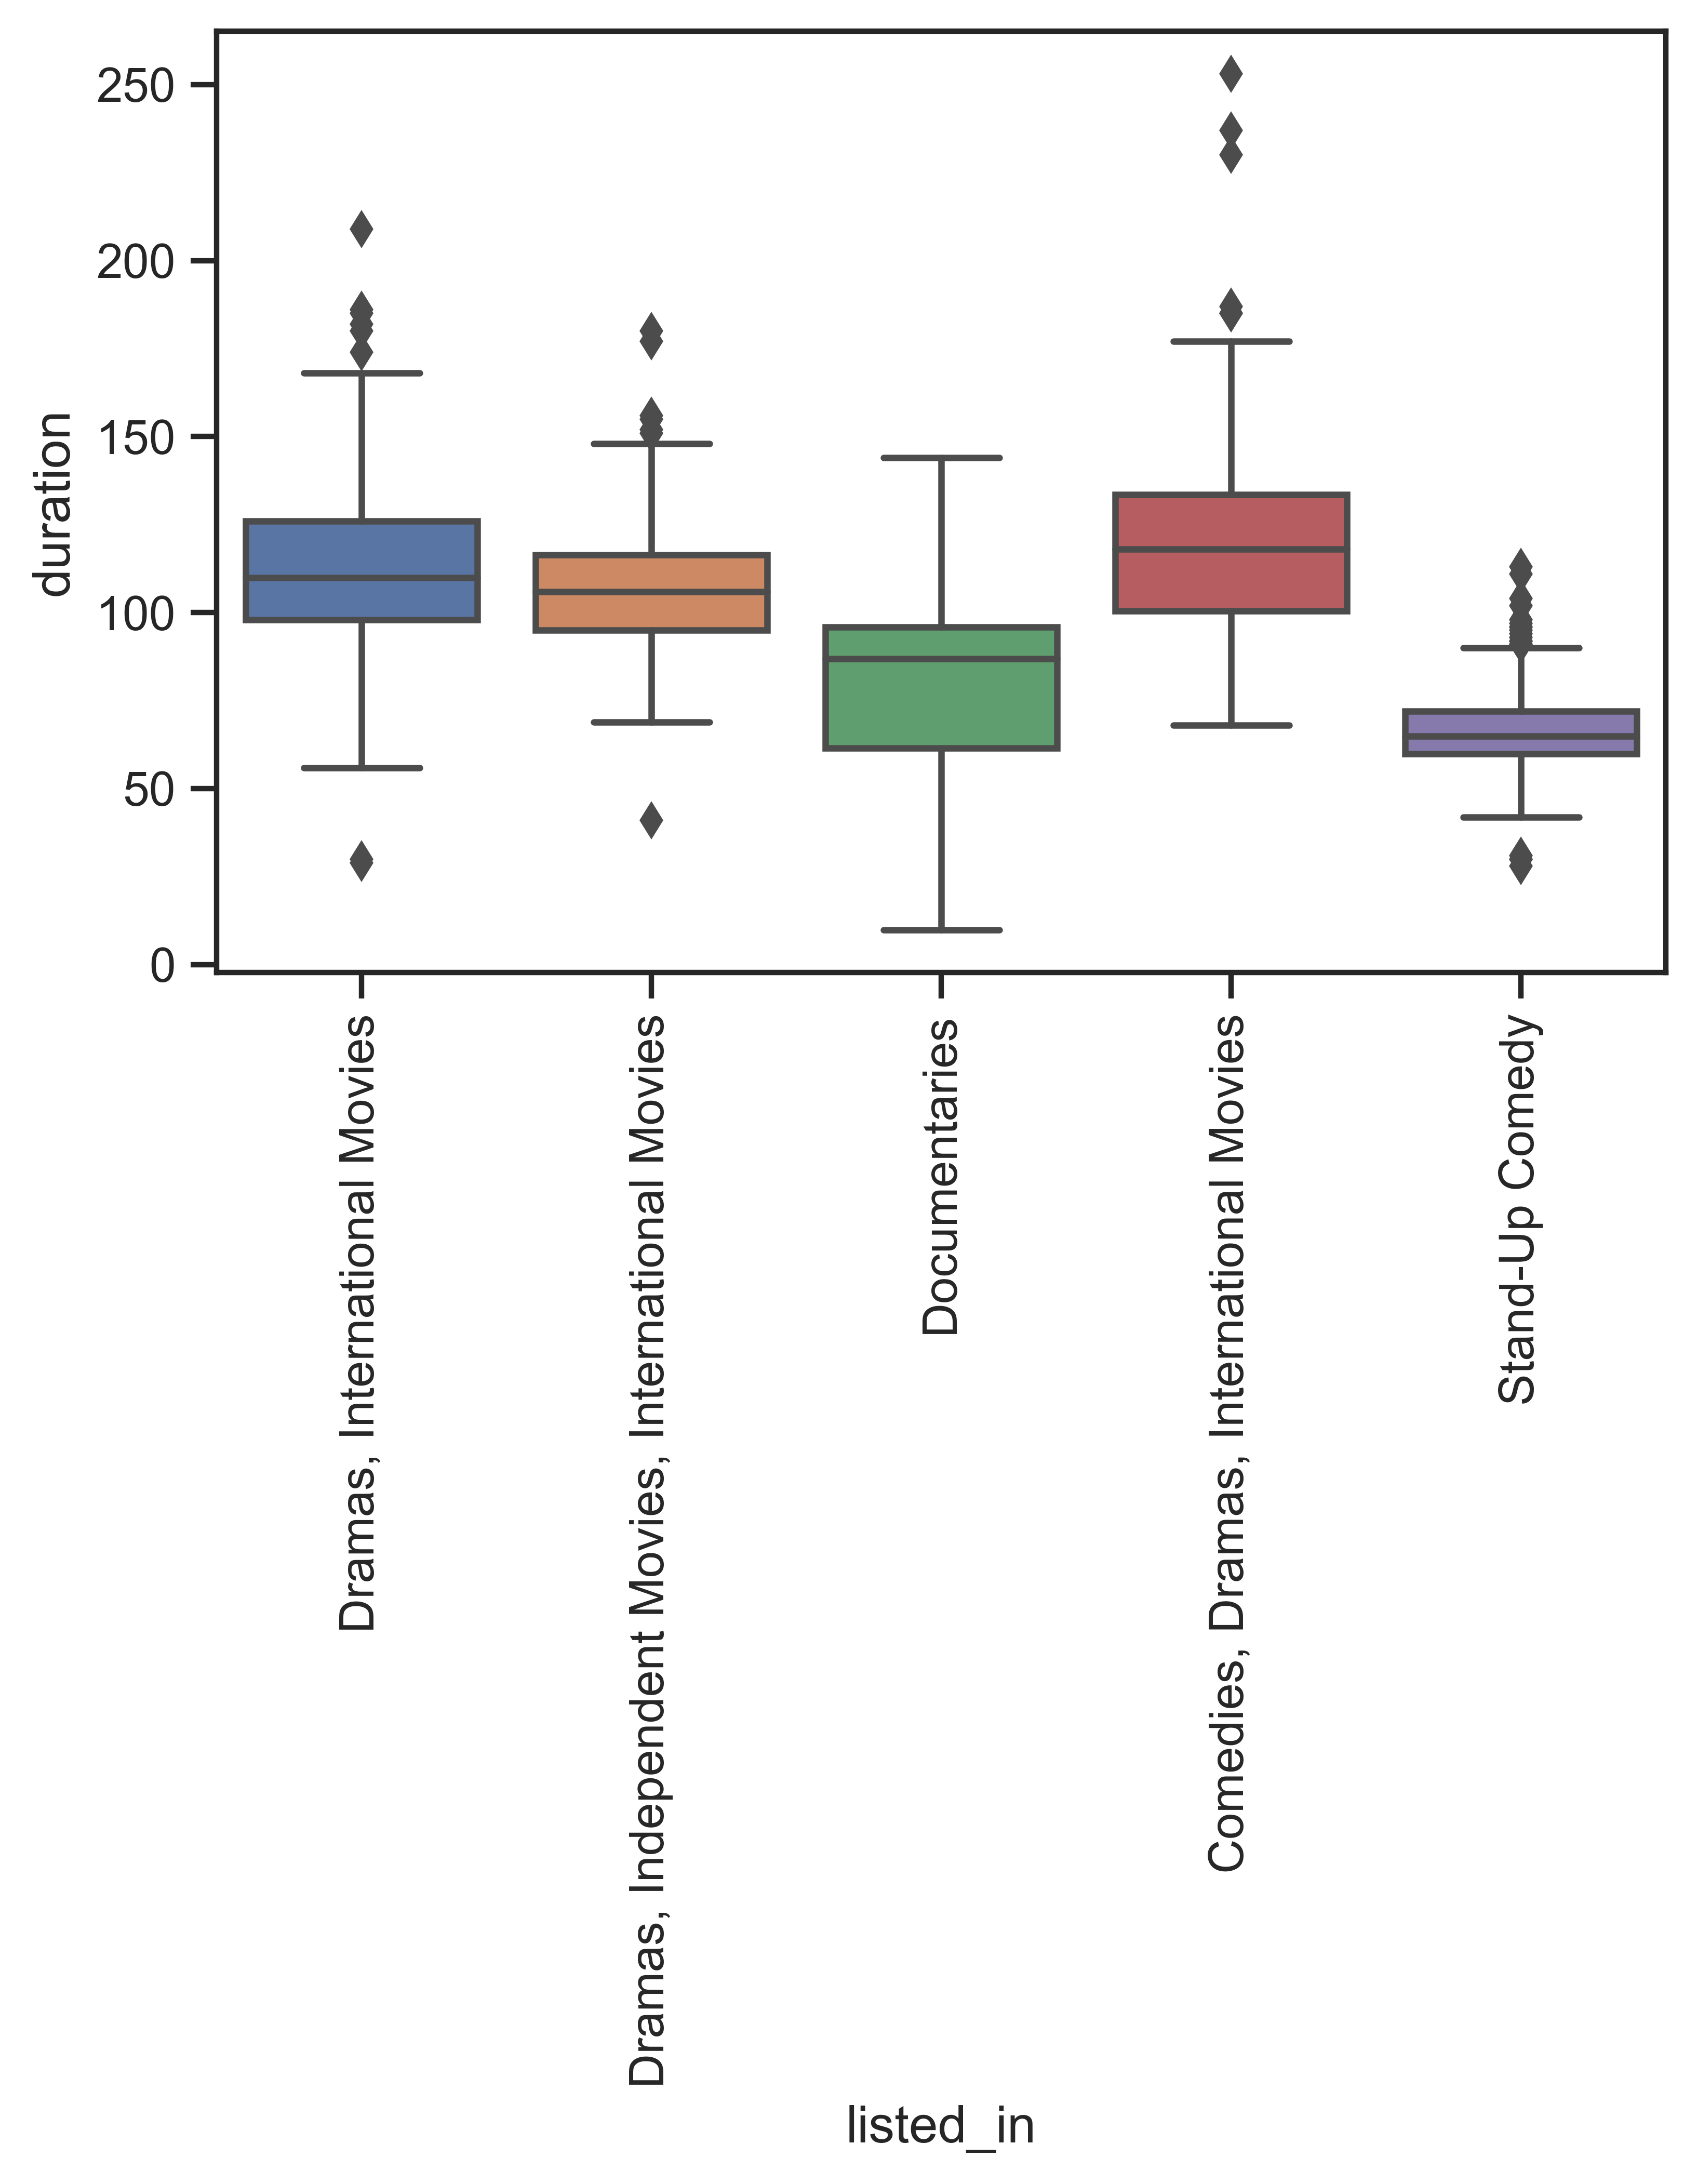

In [20]:
get_boxplot_of_categories(df_movie, 'listed_in', 'duration', 5)

Finally, let’s define a function takes a data frame and a numerical column as input and displays a histogram:

In [21]:
def get_histogram(data_frame, numerical_column):
    df_new = data_frame
    df_new[numerical_column].hist(bins=100)

Let’s call the function with the data frame and generate a histogram from ‘duration’:

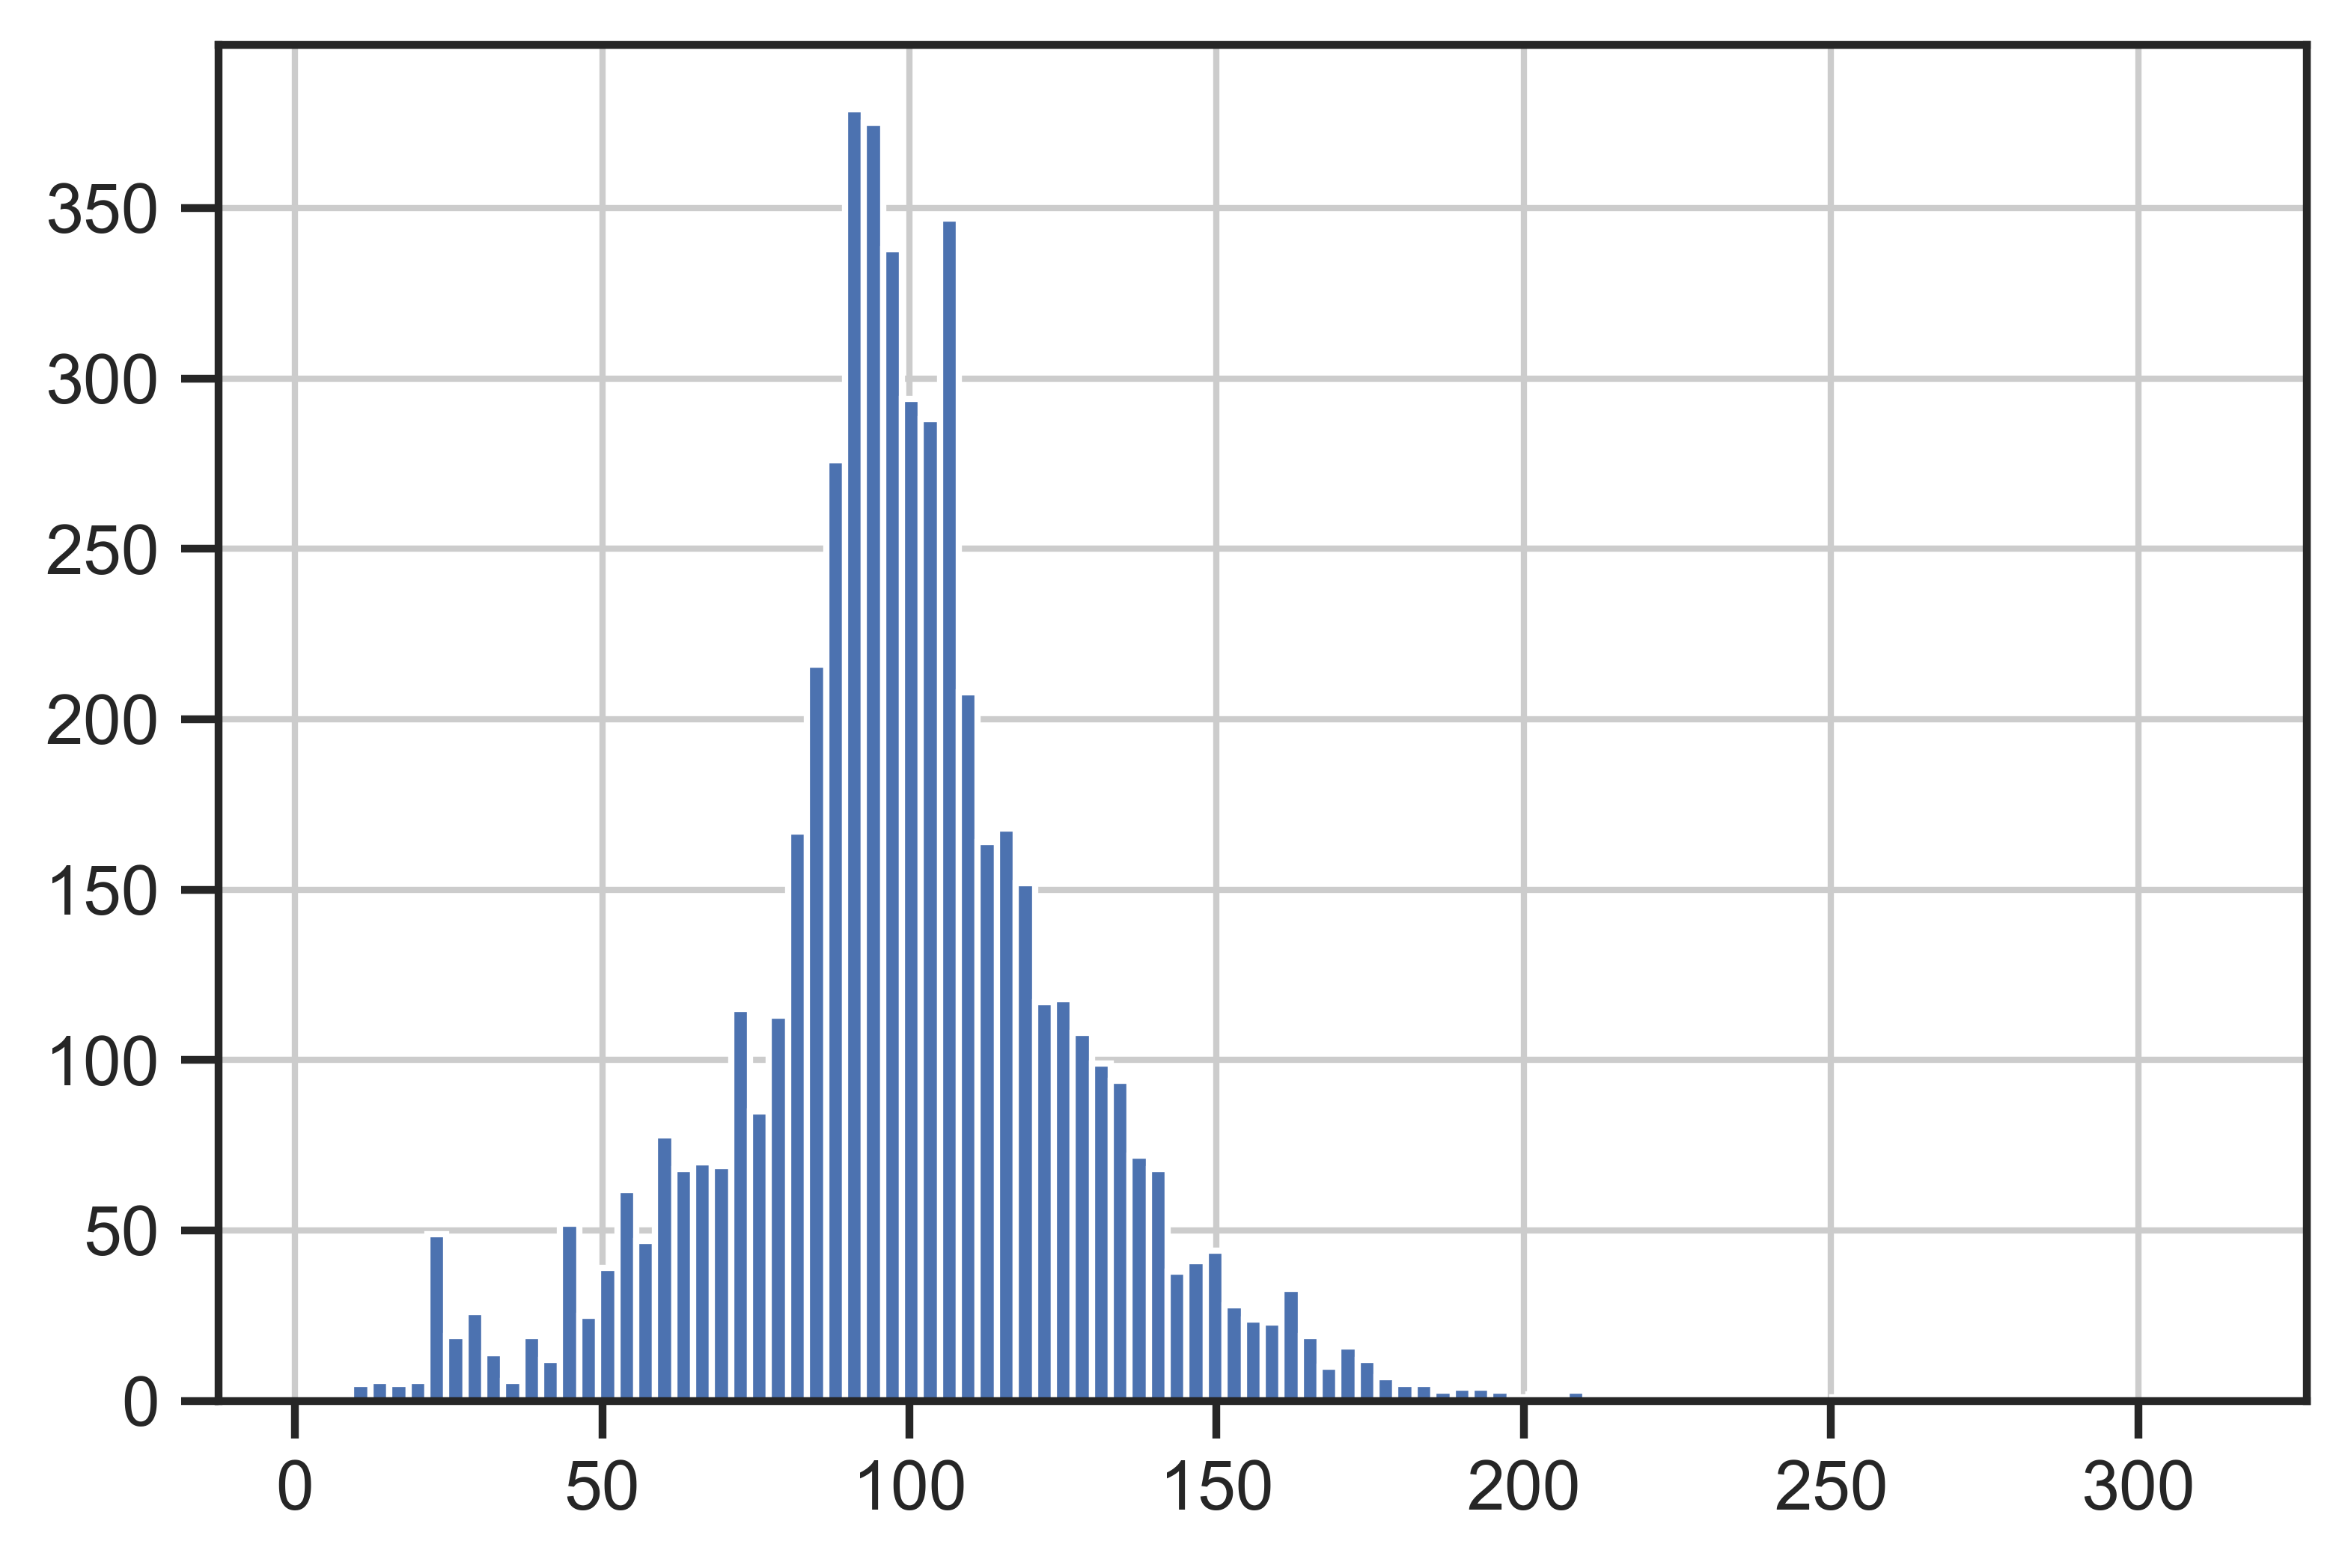

In [22]:
get_histogram(df_movie, 'duration')

##### To recap, I went over several methods for analyzing the Netflix Movies and TV Shows data set. This included defining functions for generating summary statistics like the mean, standard deviation, and counts for categorical values. We also defined functions for visualizing data with boxplots and histograms. 